<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install kaggle

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!ls ./gdrive/My\ Drive/Colab\ Notebooks/

 Dog_classification.ipynb		    Untitled0.ipynb
 Dog_detector.ipynb			   'Untitled (1).ipynb'
 Handwriiten_digits_recognition_CNN.ipynb   Untitled1.ipynb
 Herbarnium.ipynb			    Untitled2.ipynb
 kaggle.json				    Untitled3.ipynb
 MobileNet_Understanding.ipynb		    Untitled4.ipynb
 Multiclass_classification.ipynb	    Untitled7.ipynb
 Titanic_problem			    Untitled.ipynb
 Traffic_Sign_Recognition.ipynb		    YOLOv3_Tutorial.ipynb


In [0]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [0]:
# !kaggle datasets list

In [0]:
# !kaggle datasets list -s dogs

In [9]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 98% 738M/750M [00:12<00:00, 57.0MB/s]
100% 750M/750M [00:12<00:00, 64.9MB/s]


In [10]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: images/Images/n02108089-boxer/n0210

In [7]:
!ls 

gdrive	sample_data


In [44]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
fpath = "./images/Images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

In [0]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

In [0]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

In [0]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [0]:
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

In [0]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

In [0]:
display_rand_images(images, labels)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

In [0]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
model.fit(x_train, y_train, epochs=100)

In [0]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

In [0]:
pred = model.predict(x_test)

pred.shape

In [0]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

From here i am implementing the dog_classification with any 'Imagenet' trained keras model.

In [11]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [0]:
use_cuda = torch.cuda.is_available()

In [17]:
!ls ./images/Images/n02086240-Shih-Tzu/n02086240_110.jpg 

./images/Images/n02086240-Shih-Tzu/n02086240_110.jpg


In [0]:
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
VGG16.eval()
image_path = "./images/Images/"

def transfrom(image_path):
    img =Image.open(image_path)
    
img_path = './images/Images/n02086240-Shih-Tzu/n02086240_110.jpg '

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    ## Normalize the data according to the needs of the models
    transform_img = transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        
    ])
    img = Image.open(img_path)
    img = transform_img(img)
    
    # PyTorch pretrained models expect the Tensor dims to be (num input imgs, num color channels, height, width).
    # Currently however, we have (num color channels, height, width); let's fix this by inserting a new axis.
    img = img.unsqueeze(0)  # Insert the new axis at index 0 i.e. in front of the other axes/dims. 

    # Now that we have preprocessed our img, we need to convert it into a 
    # Variable; PyTorch models expect inputs to be Variables. A PyTorch Variable is a  
    # wrapper around a PyTorch Tensor.
    img = Variable(img)
    
    prediction = VGG16(img.cuda())  # Returns a Tensor of shape (batch, num class labels)
    prediction = prediction.cpu().data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
    
    return prediction # predicted class index

In [0]:
def dog_detector(img_path):
    pred=VGG16_predict(img_path)
    if pred >= 151 and pred <= 268:
        return True
    else:
        return False
    

There are 20580 total dog images.


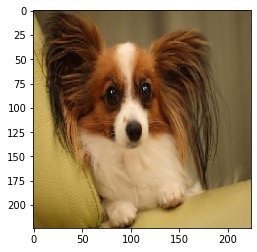

In [22]:
from matplotlib import pyplot as plt
from keras.preprocessing import image
img_path = '../content/images/Images/n02086240-Shih-Tzu/'
from glob import glob
import numpy as np
dog_files = np.array(glob("../content/images/Images/*/*"))
img = image.load_img(dog_files[1], target_size=(224,224))
plt.imshow(img)
dog_detector(dog_files[1])
print('There are %d total dog images.' % len(dog_files))

In [23]:
from tqdm import tqdm
dog_files_short = dog_files[:1000]

counter_dog   = 0

for dog_file in tqdm(dog_files_short):
    if(dog_detector(dog_file)):
        counter_dog +=1
        
print("Detected dogs in dogs files ",counter_dog,"%")

100%|██████████| 1000/1000 [00:10<00:00, 91.01it/s]

Detected dogs in dogs files  994 %


## **Create a CNN to Classify Dog Breeds (from Scratch)**

In [23]:
root_dir = '../content/images/Images/'
classes_dir = [ f.name for f in os.scandir(root_dir) if f.is_dir() ]
len(classes_dir)

123

In [0]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import shutil
import random

# # Creating Train / Val / Test folders (One time use)
root_dir = '../content/images/Images/'
classes_dir = [ f.name for f in os.scandir(root_dir) if f.is_dir() ]

val_ratio = 0.15
test_ratio = 0.05

train_root_dir = '../content/images/Images/train/'
test_root_dir = '../content/images/Images/val/'
val_root_dir = '../content/images/Images/test/'

for cls in classes_dir:
    os.makedirs(train_root_dir + cls)
    os.makedirs(val_root_dir + cls)
    os.makedirs(test_root_dir + cls)


    # Creating partitions of the data after shuffeling
    src = root_dir + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len(allFileNames)* (1 - val_ratio + test_ratio)), 
                                                               int(len(allFileNames)* (1 - test_ratio))])


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
    test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

    # print('Total images: ', len(allFileNames))
    # print('Training: ', len(train_FileNames))
    # print('Validation: ', len(val_FileNames))
    # print('Testing: ', len(test_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, train_root_dir + cls)

    for name in val_FileNames:
        shutil.copy(name, val_root_dir + cls)

    for name in test_FileNames:
        shutil.copy(name, test_root_dir + cls)

In [16]:
!ls '../content/images/Images'

n02085620-Chihuahua			  n02100877-Irish_setter
n02085782-Japanese_spaniel		  n02101006-Gordon_setter
n02085936-Maltese_dog			  n02101388-Brittany_spaniel
n02086079-Pekinese			  n02101556-clumber
n02086240-Shih-Tzu			  n02102040-English_springer
n02086646-Blenheim_spaniel		  n02102177-Welsh_springer_spaniel
n02086910-papillon			  n02102318-cocker_spaniel
n02087046-toy_terrier			  n02102480-Sussex_spaniel
n02087394-Rhodesian_ridgeback		  n02102973-Irish_water_spaniel
n02088094-Afghan_hound			  n02104029-kuvasz
n02088238-basset			  n02104365-schipperke
n02088364-beagle			  n02105056-groenendael
n02088466-bloodhound			  n02105162-malinois
n02088632-bluetick			  n02105251-briard
n02089078-black-and-tan_coonhound	  n02105412-kelpie
n02089867-Walker_hound			  n02105505-komondor
n02089973-English_foxhound		  n02105641-Old_English_sheepdog
n02090379-redbone			  n02105855-Shetland_sheepdog
n02090622-borzoi			  n02106030-collie
n02090721-Irish_wolfhound		  n02106166-Border_collie
n02091032-Italia

In [0]:
data_dir = "../content/images/Images"
num_workers = 0
batch_size = 10
data_transforms = {
    'train' : transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # no need of image augmentation for the validation test set    
    'valid' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    # test dataset flips can  be found out in fast.ai
    'test' : transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}


train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'

image_datasets = {
    'train' : datasets.ImageFolder(root=train_dir,transform=data_transforms['train']),
    'valid' : datasets.ImageFolder(root=valid_dir,transform=data_transforms['valid']),
    'test' : datasets.ImageFolder(root=test_dir,transform=data_transforms['test'])
}

# Loading Dataset
loaders_scratch = {
    'train' : torch.utils.data.DataLoader(image_datasets['train'],batch_size = batch_size,shuffle=True),
    'valid' : torch.utils.data.DataLoader(image_datasets['valid'],batch_size = batch_size),
    'test' : torch.utils.data.DataLoader(image_datasets['test'],batch_size = batch_size)    
}

In [19]:
print(loaders_scratch['train'])

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Follow the architecture of VGG-16
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv4 = nn.Conv2d(64, 128, 3)
        self.conv5 = nn.Conv2d(128, 256, 3)
        
        self.fc1 = nn.Linear(256 * 6 * 6, 120)
        self.max_pool = nn.MaxPool2d(2, 2,ceil_mode=True)
        
        self.dropout = nn.Dropout(0.20)
        
        self.conv_bn1 = nn.BatchNorm2d(224,3)
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
        
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.max_pool(x)
        x = self.conv_bn2(x)

        x = F.relu(self.conv2(x))
        x = self.max_pool(x)
        x = self.conv_bn3(x)

        x = F.relu(self.conv3(x))
        x = self.max_pool(x)
        x = self.conv_bn4(x)

        x = F.relu(self.conv4(x))
        x = self.max_pool(x)
        x = self.conv_bn5(x)

        x = F.relu(self.conv5(x))
        x = self.max_pool(x)
        x = self.conv_bn6(x)

        x = x.view(-1, 256 * 6 * 6)

        x = self.dropout(x)
        x = self.fc1(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [25]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=9216, out_features=120, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv_bn1): BatchNorm2d(224, eps=3, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6): BatchNorm2d(

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.005)

In [28]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # Loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # Optimization
            optimizer.step()
            # update training loss
            # train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
          
            output = model(data)
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
                
            # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss  
            
    # return trained model
    return model


# train the model
model_scratch = train(5, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 0.000270 	Validation Loss: 0.004220
Validation loss decreased (inf --> 0.004220).  Saving model ...
Epoch: 2 	Training Loss: 0.000260 	Validation Loss: 0.004066
Validation loss decreased (0.004220 --> 0.004066).  Saving model ...
Epoch: 3 	Training Loss: 0.000250 	Validation Loss: 0.003945
Validation loss decreased (0.004066 --> 0.003945).  Saving model ...
Epoch: 4 	Training Loss: 0.000240 	Validation Loss: 0.003789
Validation loss decreased (0.003945 --> 0.003789).  Saving model ...
Epoch: 5 	Training Loss: 0.000233 	Validation Loss: 0.003583
Validation loss decreased (0.003789 --> 0.003583).  Saving model ...


<All keys matched successfully>

In [29]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.843848


Test Accuracy: 13% (139/1033)
